In [3]:
%load_ext autoreload
%autoreload 2

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [4]:
# Import standard modules
import numpy as np
import h5py
import matplotlib.pyplot as plt
plt.set_cmap('jet')
import os
import pickle

<Figure size 432x288 with 0 Axes>

In [4]:
# Import torch modules
import torch
from torch import FloatTensor, cat, from_numpy
from torch.autograd import Variable
from torchsummary import summary

In [10]:
import sys
sys.path.append('/data3/Astro/personal/yiminliu/cnnpca3d/')

In [11]:
# Import transform net
from transformer_net import TransformerNet

In [12]:
# Import utils function
from utils import dot_dict, load_model, parse_content_style_size, gram_matrix

#### 1. Specify options

In [13]:
device = 'cuda'

In [14]:
data_dir = '/data3/Astro/personal/yiminliu/models/3d_levee_wide_60x60x40_cond6w/'

In [15]:
args = {}
args['content_size'] = '40, 60, 60'
args['style_size'] = '40, 60, 60'
args['pca_model'] = os.path.join(data_dir, 'mpca_eval1000_levee_wider_wellsonly_60x60x40_cond6w_l800.h5')
args['petrel_model'] = os.path.join(data_dir, 'facies_train3000_60x60x40_levee_wider_wellonlys_cond6w.h5')
args['rec_model'] = os.path.join(data_dir, 'mpca_rec3000_60x60x40_levee_wide_cond6w_l800_ptb70_std1.h5')
args['style_weight'] = 100.0
args['rec_weight'] = 500.0
args['epochs'] = 10
args['save_model'] = './saved_models/cnnpca_levee_wider_wellsonly_60x60x40_cond6w_l800_ptb70_sw50.0_rw500.0_hw10.0_9ep.model'
args['log_interval'] = 10
args['batch_size'] = 8
args['hd_file'] = os.path.join(data_dir, 'well_hd_wider_wellsonly.pickle')
args['hd_weight'] = 10.0
args['c3d_model'] = '/data3/Astro/personal/yiminliu/cnnpca3d/c3d.pickle'
args = dot_dict(args)

#### 2. Load data

In [11]:
args = parse_content_style_size(args)
content_size = args.content_size
print('content size:', content_size)

content size: [40, 60, 60]


In [12]:
# Load PCA model
m_pca =load_model(args.pca_model)
print(m_pca.max(), m_pca.min())
num_model = m_pca.shape[0]
m_pca = m_pca.reshape((num_model,1) + tuple(content_size))
m_pca.shape

4.883 -3.201


(1000, 1, 40, 60, 60)

In [13]:
# Normalize data
max_, min_ = 2., 0.
m_pca = (m_pca - min_) / (max_ - min_) * 255.
print(m_pca.max(), m_pca.min())
# style_model_data = (style_model_data - min_) / (max_ - min_) * 255.
# print(style_model_data.max(), style_model_data.min())

622.5 -408.2


#### 3. Construct Transform Net

In [14]:
transformer = TransformerNet()
transformer = transformer.to(device)
summary(transformer, input_size=(1, 40, 60, 60))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
      CirularPad3d-1        [-1, 1, 42, 68, 68]               0
            Conv3d-2       [-1, 32, 40, 60, 60]           7,808
         ConvLayer-3       [-1, 32, 40, 60, 60]               0
       BatchNorm3d-4       [-1, 32, 40, 60, 60]              64
              ReLU-5       [-1, 32, 40, 60, 60]               0
      CirularPad3d-6       [-1, 32, 42, 62, 62]               0
            Conv3d-7       [-1, 64, 20, 30, 30]          55,360
         ConvLayer-8       [-1, 64, 20, 30, 30]               0
       BatchNorm3d-9       [-1, 64, 20, 30, 30]             128
             ReLU-10       [-1, 64, 20, 30, 30]               0
     CirularPad3d-11       [-1, 64, 22, 32, 32]               0
           Conv3d-12      [-1, 128, 20, 15, 15]         221,312
        ConvLayer-13      [-1, 128, 20, 15, 15]               0
      BatchNorm3d-14      [-1, 128, 20,

#### 6. Evaluation

In [15]:
transformer.load_state_dict(torch.load(args.save_model))
transformer.eval()
print('')

In [16]:
num_model = m_pca.shape[0]

In [17]:
batch_size = 8
num_batch = num_model // batch_size
m_pca_pred = np.zeros_like(m_pca)

In [18]:
# num_batch = 2

In [19]:
for ib in range(num_batch):
    print(ib+1, num_batch)
    ind0 = ib * batch_size
    ind1 = ind0 + batch_size
    data = m_pca[ind0:ind1, ...]
    m_pca_pred[ind0:ind1, ...] = transformer(Variable(torch.from_numpy(data).float()).to(device)).data.cpu().numpy()

1 125
2 125
3 125
4 125
5 125
6 125
7 125
8 125
9 125
10 125
11 125
12 125
13 125
14 125
15 125
16 125
17 125
18 125
19 125
20 125
21 125
22 125
23 125
24 125
25 125
26 125
27 125
28 125
29 125
30 125
31 125
32 125
33 125
34 125
35 125
36 125
37 125
38 125
39 125
40 125
41 125
42 125
43 125
44 125
45 125
46 125
47 125
48 125
49 125
50 125
51 125
52 125
53 125
54 125
55 125
56 125
57 125
58 125
59 125
60 125
61 125
62 125
63 125
64 125
65 125
66 125
67 125
68 125
69 125
70 125
71 125
72 125
73 125
74 125
75 125
76 125
77 125
78 125
79 125
80 125
81 125
82 125
83 125
84 125
85 125
86 125
87 125
88 125
89 125
90 125
91 125
92 125
93 125
94 125
95 125
96 125
97 125
98 125
99 125
100 125
101 125
102 125
103 125
104 125
105 125
106 125
107 125
108 125
109 125
110 125
111 125
112 125
113 125
114 125
115 125
116 125
117 125
118 125
119 125
120 125
121 125
122 125
123 125
124 125
125 125


In [20]:
# Define well locations
well_loc = [(12, 12), (28, 3), (4, 26), (48, 48), (58, 31), (32, 57)]
well_names = [ 'I1', 'I2', 'I3', 'P1', 'P2', 'P3']

In [21]:
def plot_wells(c='k'):
    for wl, wn in zip(well_loc, well_names):
        plt.plot(wl[0]-1, wl[1]-1, c+'.', markersize=20)
        plt.text(wl[0]+2, wl[1]+2, wn, color=c, fontsize=20)

In [22]:
m_pca_pred[:, 0, :3, :45, 40:55] = 0
m_pca_pred[:, 0, :3, 5:20, 15:] = 0

Model 0


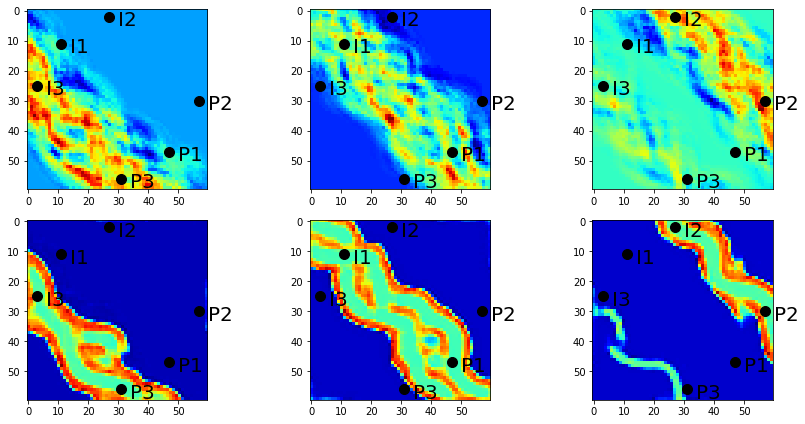

Model 1


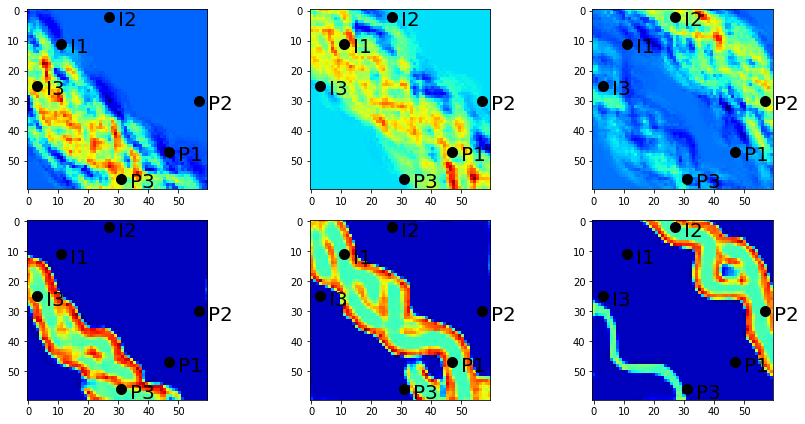

Model 2


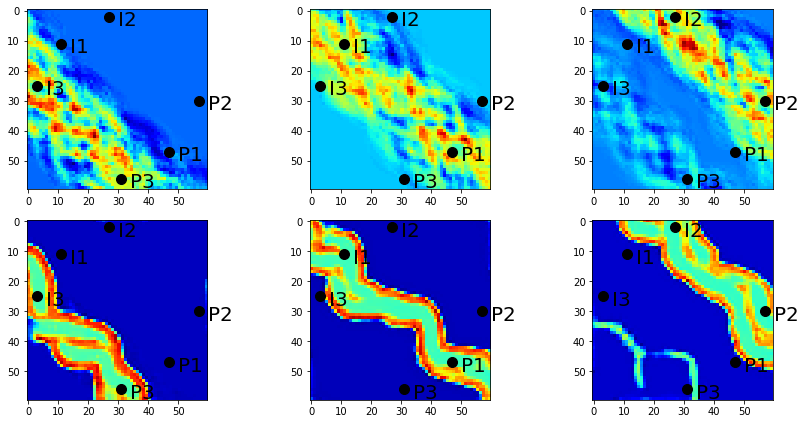

Model 3


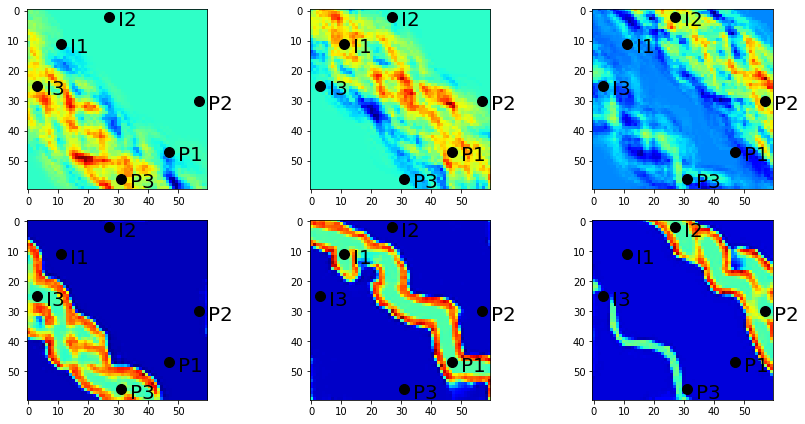

Model 4


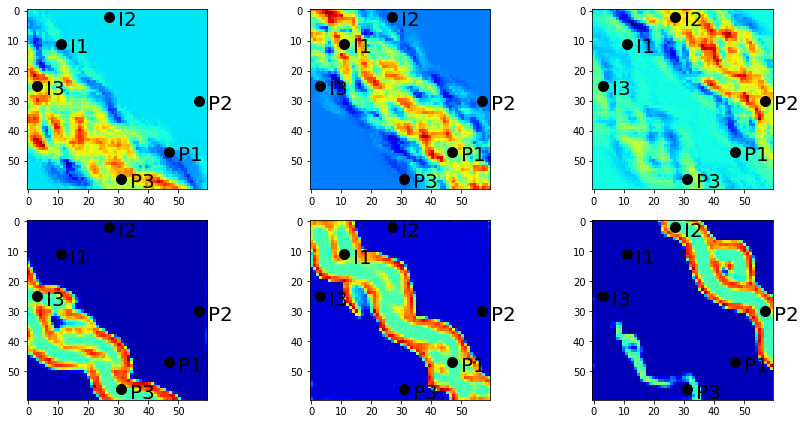

In [23]:
layers = [0, 15, 25]
nz = len(layers)
for k in range(5):
    print('Model', k)
    plt.figure(figsize=(12,6))
    for ind, z in enumerate(layers):
        plt.subplot(2,nz,ind+1)
        plt.imshow(m_pca[k, 0, z, :, :].astype('double'))
        plot_wells()
#         plt.clim([0,255])
        plt.subplot(2,nz,ind+nz+1)
        plt.imshow(m_pca_pred[k, 0, z, :, :].astype('double'))
        plot_wells()
#         plt.clim([0,255])
    plt.tight_layout()
    plt.show()
        

##### 7. Histogram Transformation

In [16]:
# Load petrel generated data
fid = h5py.File(args.petrel_model, 'r')
m_cond = np.array(fid['data'])
fid.close()
m_cond = m_cond.transpose((0, -1, 1,2,3))
m_cond.shape

(3000, 1, 40, 60, 60)

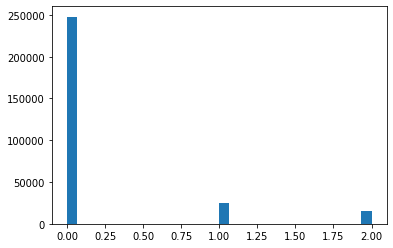

In [17]:
plt.hist(m_cond[:2, ...].flatten(),30)
plt.show()

In [18]:
bins = 200
hist, bins_target = np.histogram(m_cond.flatten(), bins)
cdf_target = hist.cumsum()
cdf_target = cdf_target / cdf_target.max()
cdf_target = np.concatenate(([0], cdf_target))

In [27]:
import pickle
fn = 'target_hist.h5'
with h5py.File(fn, 'w') as fid:
    fid.create_dataset('bins', data=np.array(bins))
    fid.create_dataset('cdf_target', data=cdf_target)
    fid.create_dataset('bins_target', data=bins_target)



In [33]:
with h5py.File(fn, 'r') as fid:
    bins = np.array(fid['bins'])
    cdf_target = np.array(fid['cdf_target'])
    bins_target = np.array(fid['bins_target'])

In [27]:
def hist_trans(data, cdf_target, bins_target, bins):
    hist, bins = np.histogram(data.flatten(), bins)
    cdf = hist.cumsum()
    cdf = cdf / cdf.max()
    cdf = np.concatenate(([0], cdf))
    # Histogram transformation
    cdf_values = np.interp(data.flatten(), bins, cdf)
    data_ht = np.interp(cdf_values, cdf_target, bins_target)
    data_ht = data_ht.reshape(data.shape)
    return data_ht

In [28]:
num_model

1000

In [29]:
# content_model_pred_crop = np.copy(content_model_pred) / 255.
# content_model_pred_crop[np.where()]

In [30]:
batch_size = 20
num_batch = num_model // batch_size
m_pca_pred_ht = np.zeros_like(m_pca_pred)
for ib in range(num_batch):
    print(ib+1, num_batch)
    ind0 = ib * batch_size
    ind1 = ind0 + batch_size
    data = m_pca_pred[ind0:ind1, ...]
    m_pca_pred_ht[ind0:ind1, ...] = hist_trans(data, cdf_target, bins_target, bins)

1 50
2 50
3 50
4 50
5 50
6 50
7 50
8 50
9 50
10 50
11 50
12 50
13 50
14 50
15 50
16 50
17 50
18 50
19 50
20 50
21 50
22 50
23 50
24 50
25 50
26 50
27 50
28 50
29 50
30 50
31 50
32 50
33 50
34 50
35 50
36 50
37 50
38 50
39 50
40 50
41 50
42 50
43 50
44 50
45 50
46 50
47 50
48 50
49 50
50 50


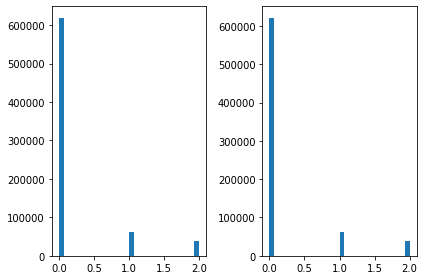

In [31]:
plt.subplot(1,2,1)
plt.hist(m_cond[:5, ...].flatten(),30)
plt.subplot(1,2,2)
plt.hist(m_pca_pred_ht[:5, ...].flatten(),30)
plt.tight_layout()
plt.show()

Model 1


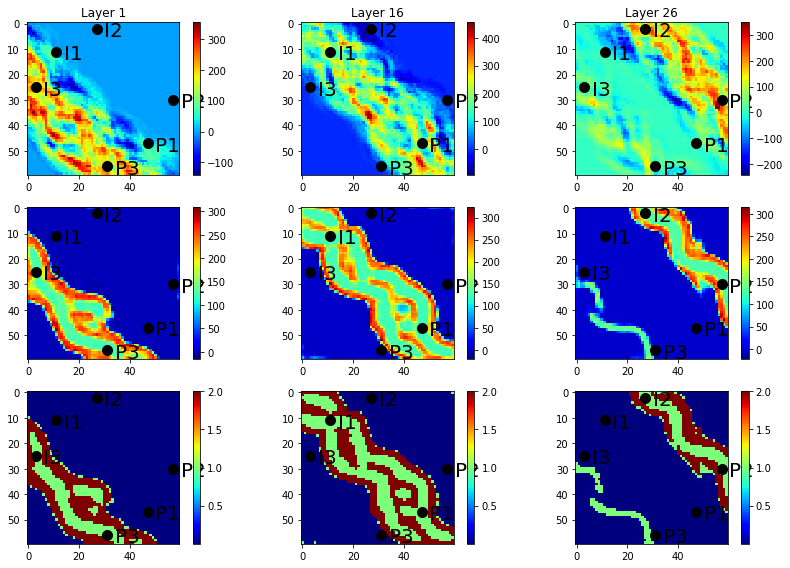

Model 2


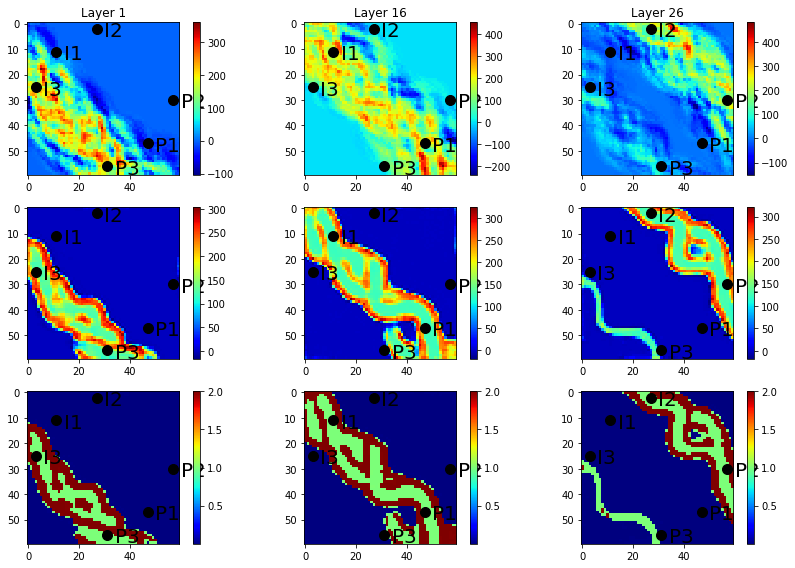

Model 3


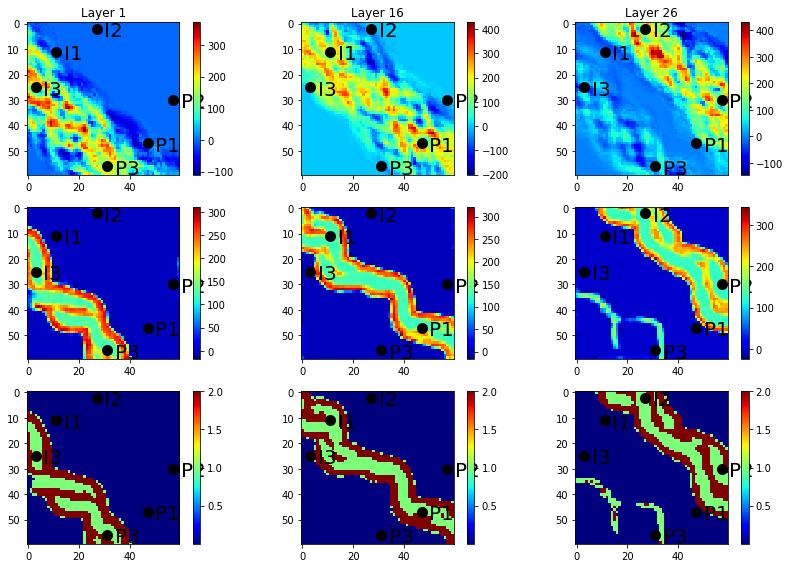

Model 4


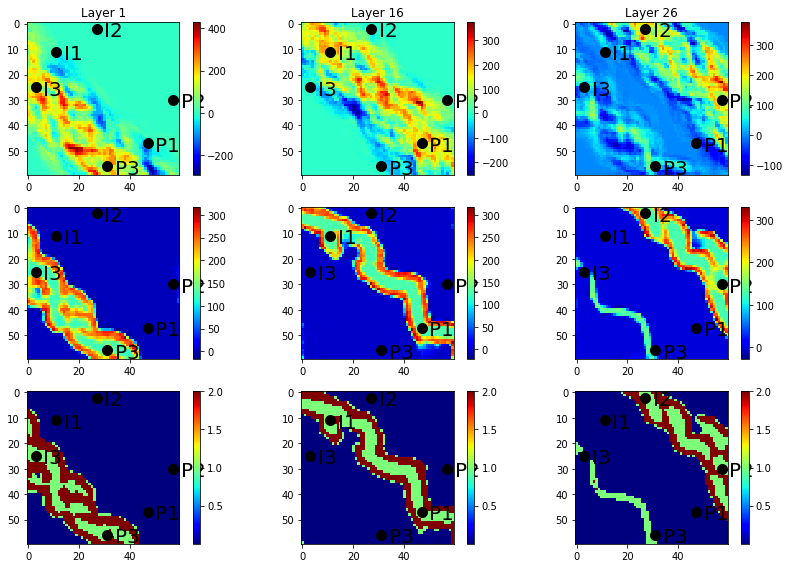

Model 5


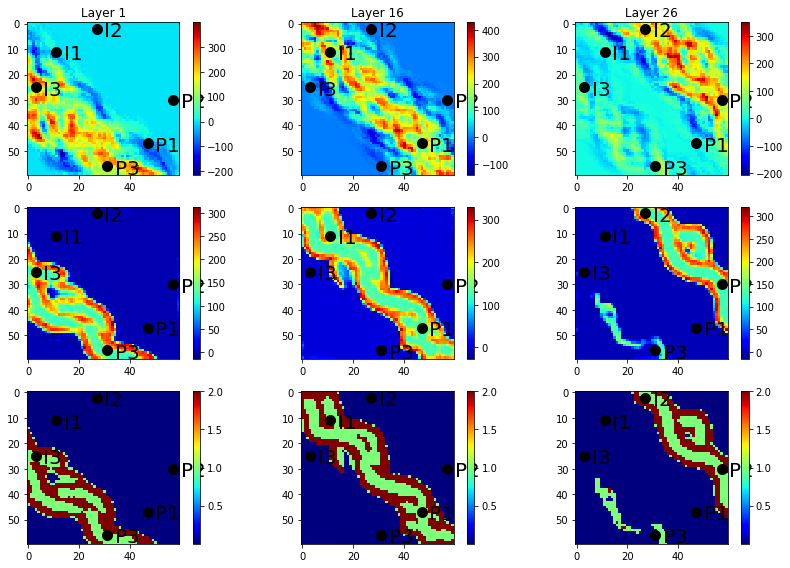

Model 6


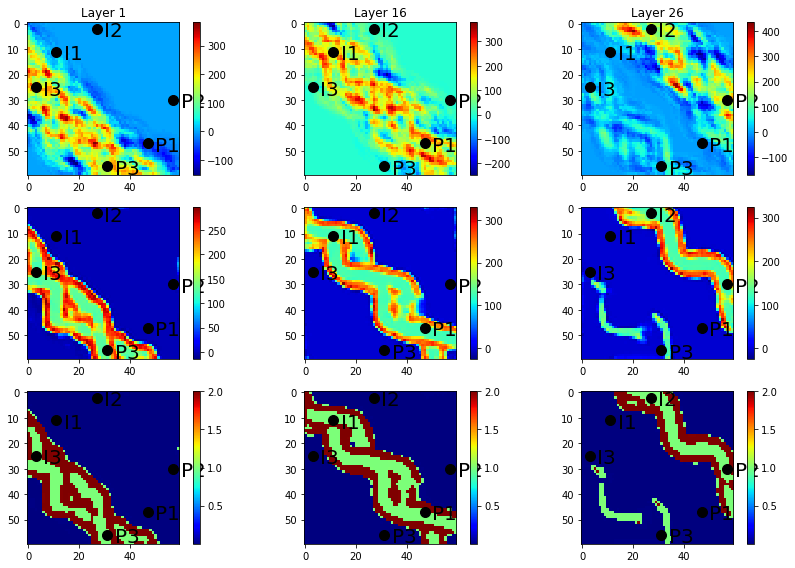

Model 7


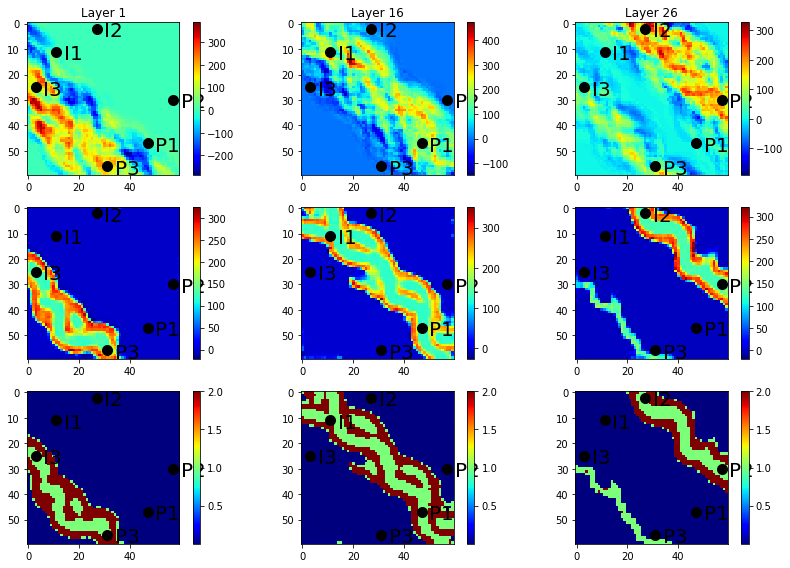

Model 8


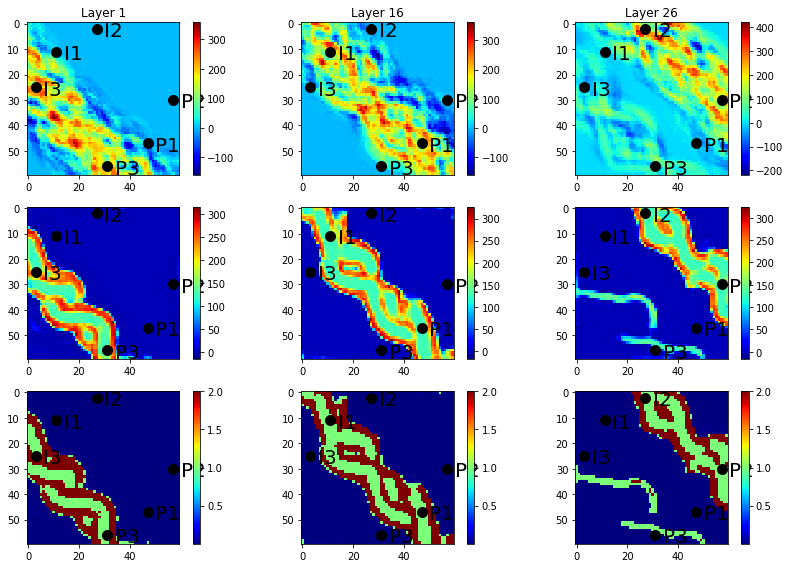

Model 9


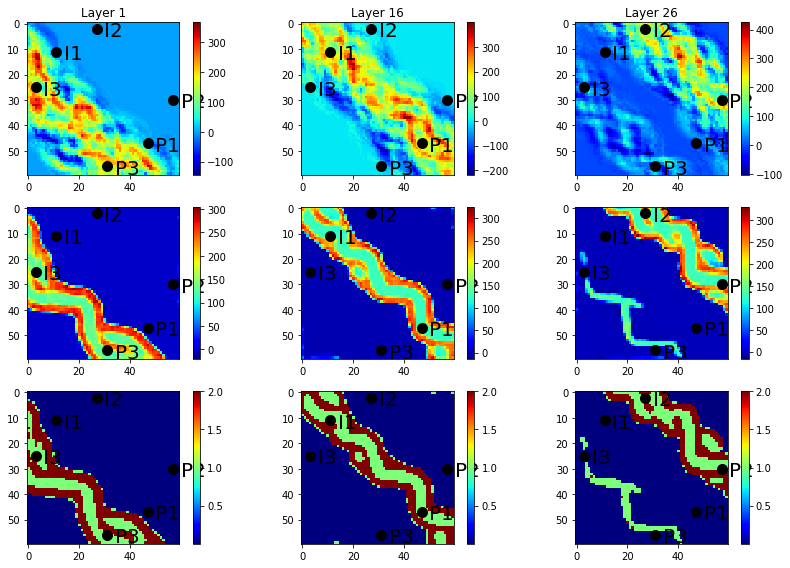

Model 10


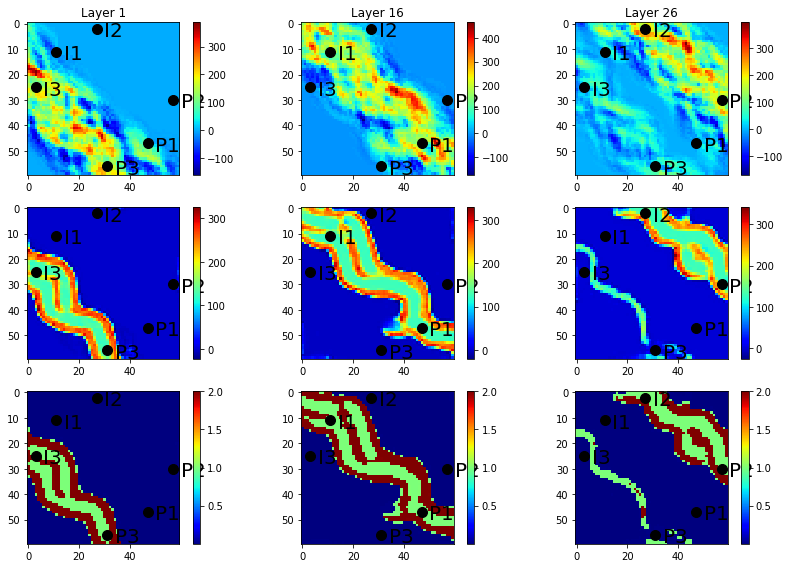

Model 11


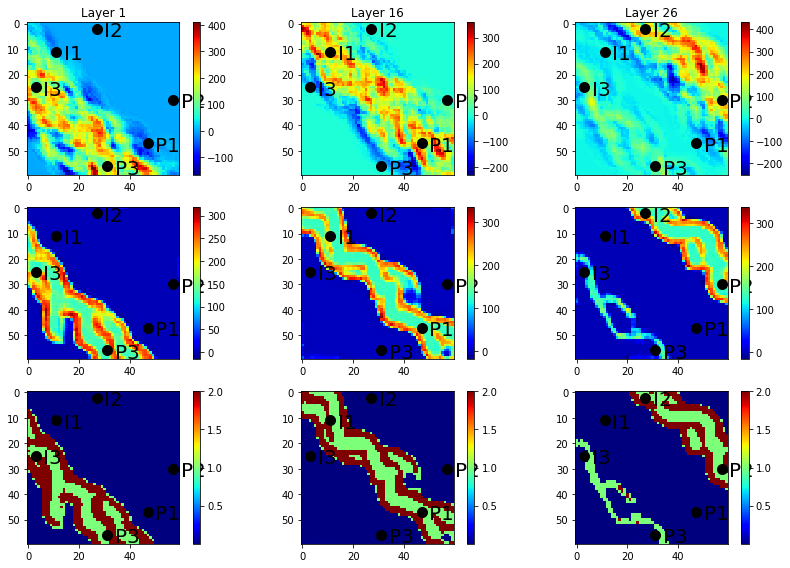

Model 12


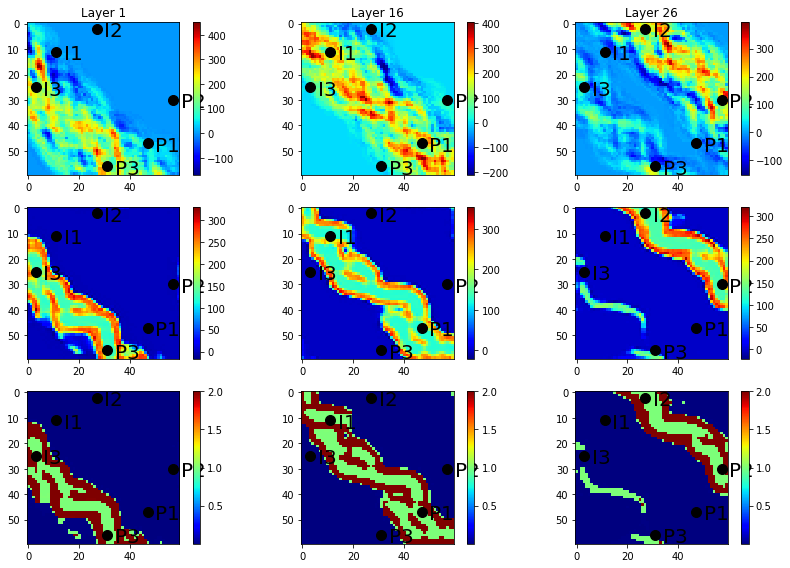

Model 13


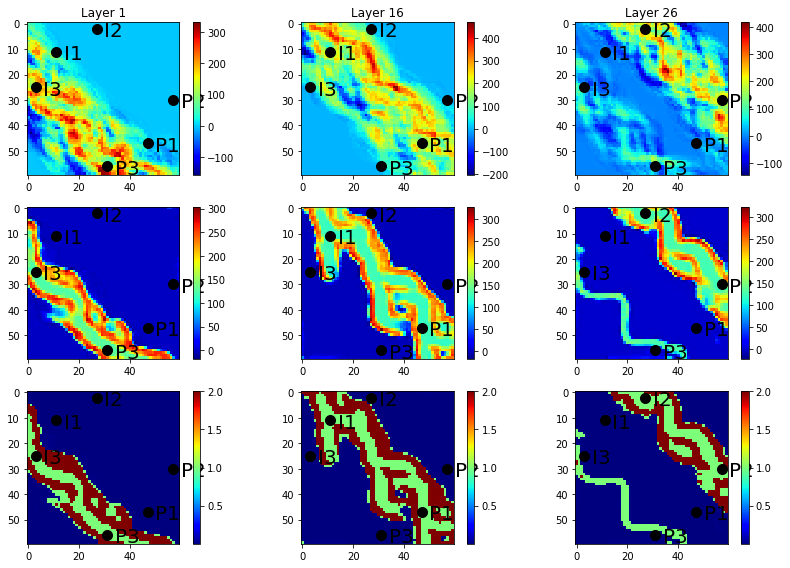

Model 14


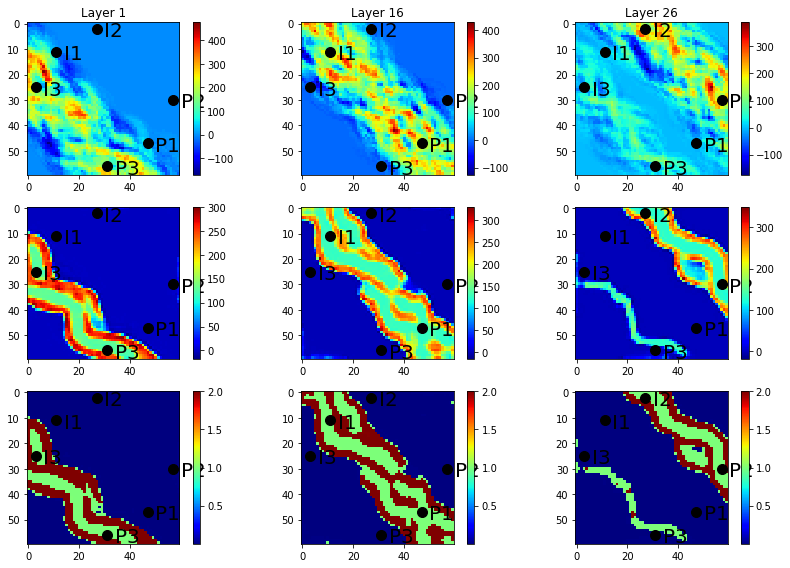

Model 15


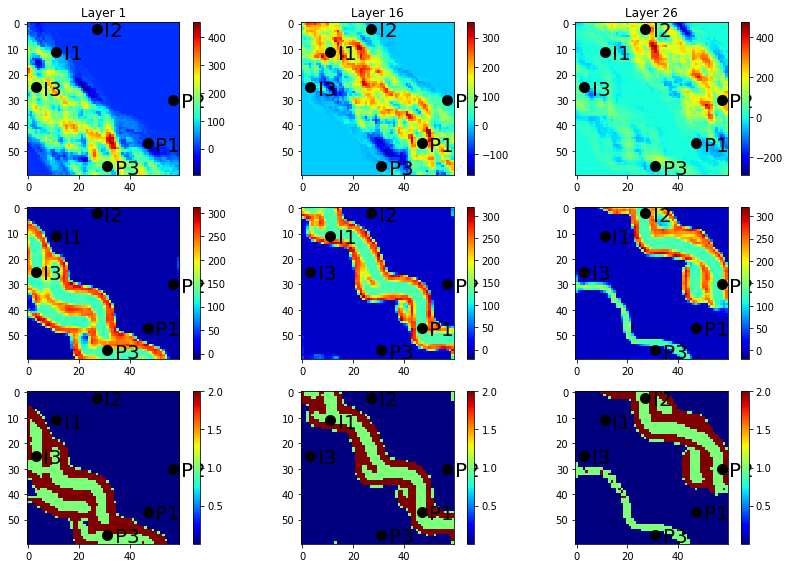

Model 16


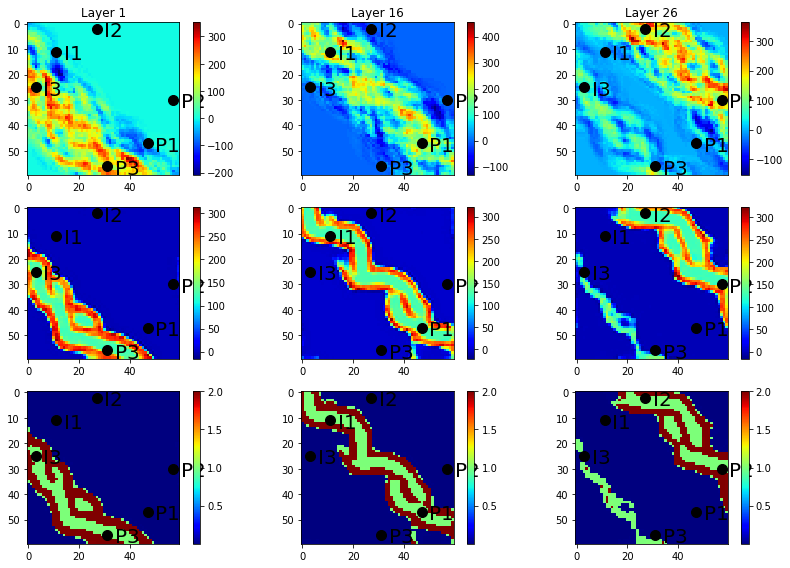

Model 17


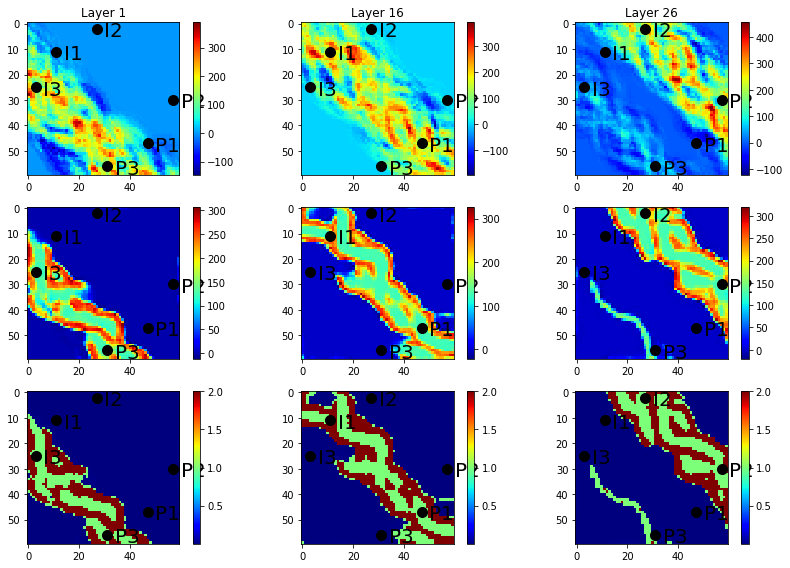

Model 18


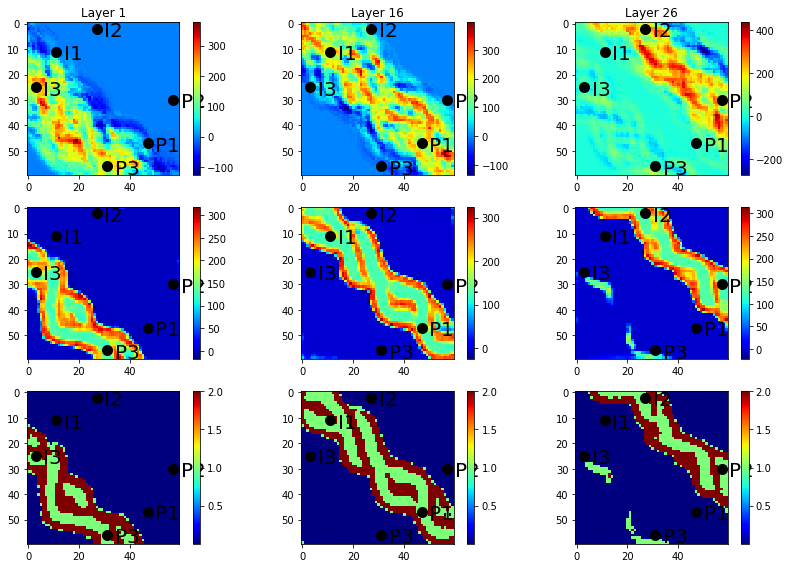

Model 19


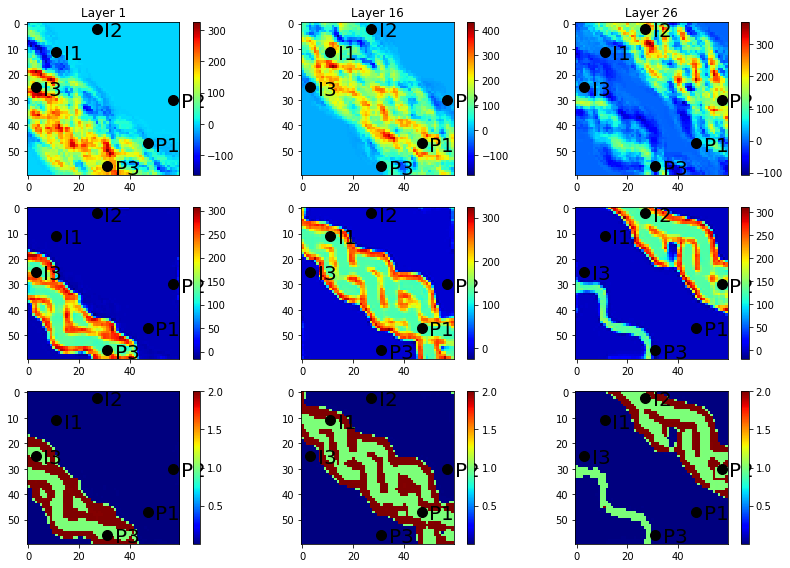

Model 20


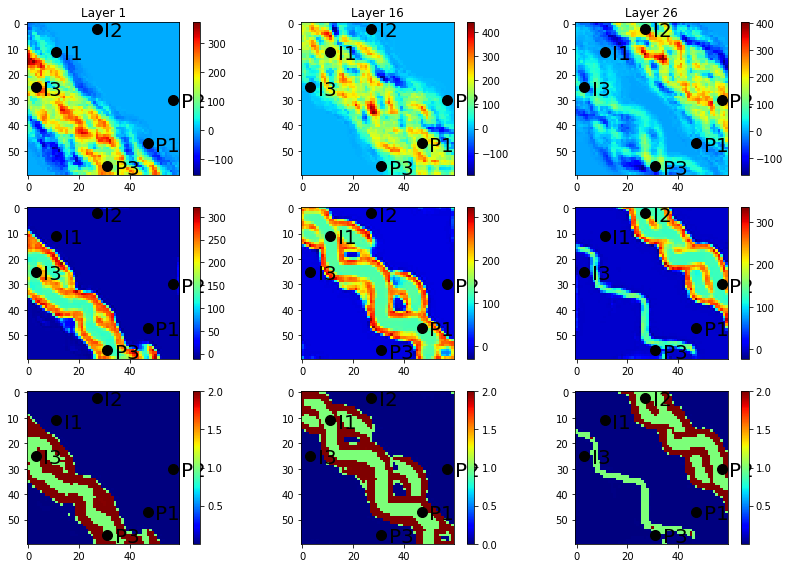

In [32]:
layers = [0, 15, 25]
nz = len(layers)
for k in range(20):
    print('Model %d' % (k+1))
    plt.figure(figsize=(12,8))
    for ind, z in enumerate(layers):
        plt.subplot(3,nz,ind+1)
        plt.imshow(m_pca[k, 0, z, :, :].astype('double'))
        plot_wells()
        plt.colorbar(fraction=0.046)
        plt.title('Layer %d' % (z+1))
        plt.subplot(3,nz,ind+nz+1)
        plt.imshow(m_pca_pred[k, 0, z, :, :].astype('double'))
        plot_wells()
        plt.colorbar(fraction=0.046)
        plt.subplot(3,nz,ind+2*nz+1)
        plt.imshow(m_pca_pred_ht[k, 0, z, :, :].astype('double'))
        plot_wells()
        plt.colorbar(fraction=0.046)
    plt.tight_layout()
    plt.show()
    
        

In [33]:
# m_pca_pred_ht[np.where(m_pca_pred_ht>=0.5)] = 1.0
# m_pca_pred_ht[np.where(m_pca_pred_ht<0.5)] = 0.0

Model 1


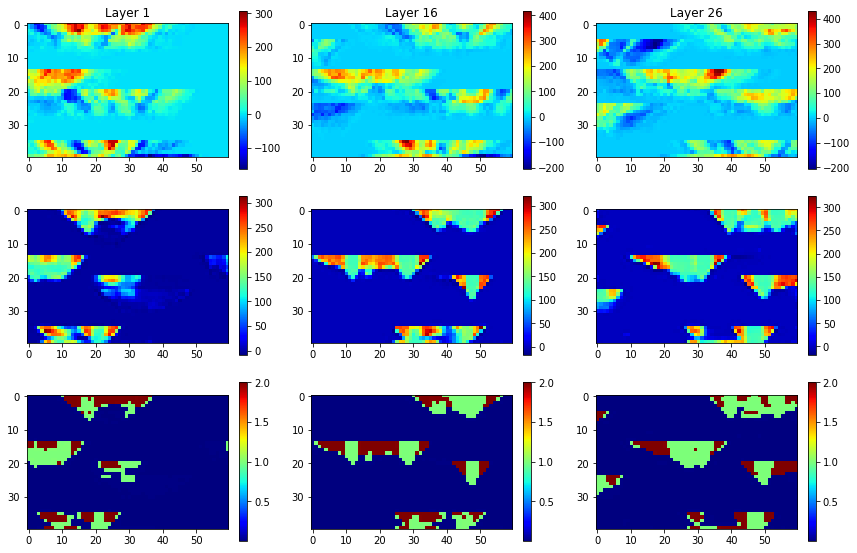

Model 2


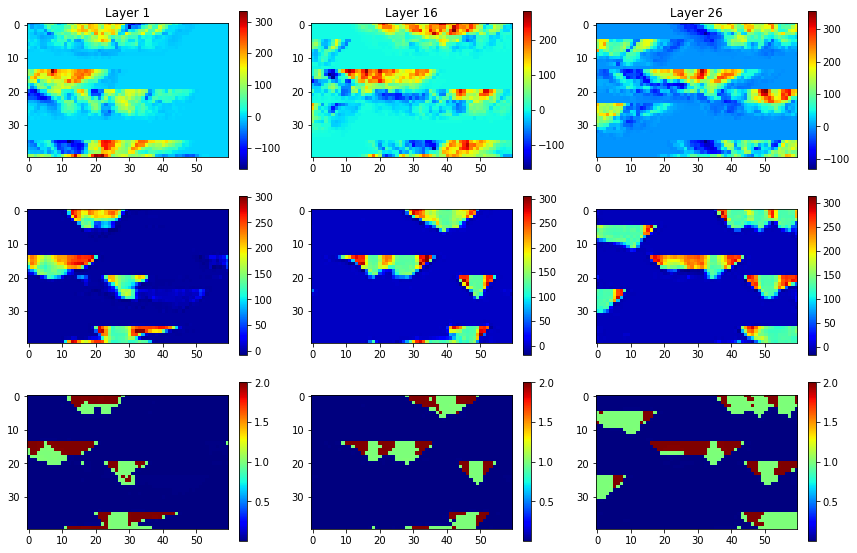

In [34]:
layers = [0, 15, 25]
nz = len(layers)
for k in range(2):
    print('Model %d' % (k+1))
    plt.figure(figsize=(12,8))
    for ind, z in enumerate(layers):
        plt.subplot(3,nz,ind+1)
        plt.imshow(m_pca[k, 0, :, :, z].astype('double'))
#         plot_wells()
        plt.colorbar(fraction=0.046)
        plt.title('Layer %d' % (z+1))
        plt.subplot(3,nz,ind+nz+1)
        plt.imshow(m_pca_pred[k, 0, :, :, z].astype('double'))
#         plot_wells()
        plt.colorbar(fraction=0.046)
        plt.subplot(3,nz,ind+2*nz+1)
        plt.imshow(m_pca_pred_ht[k, 0, :, :, z].astype('double'))
#         plot_wells()
        plt.colorbar(fraction=0.046)
    plt.tight_layout()
    plt.show()
    
        

In [35]:
m_pca_pred_ht.shape

(1000, 1, 40, 60, 60)

In [36]:
m_pca_pred_ht = m_pca_pred_ht.transpose((0,2,3,4,1))
m_pca_pred_ht.shape

(1000, 40, 60, 60, 1)

In [37]:
### Switch chan and levee
def switch(data):
    data[np.where(data==2.0)] = 3.0
    data[np.where(data==1.0)] = 2.0
    data[np.where(data==3.0)] = 1.0
    return data

In [38]:
m_pca_pred_ht = m_pca_pred_ht.round()

In [39]:
# m_pca_pred_ht[np.where(m_pca_pred_ht > 1.5)] = 2.0
# m_pca_pred_ht[np.where(m_pca_pred_ht < 0.5)] = 0.0
# m_pca_pred_ht[np.where((m_pca_pred_ht > 0.5) & (m_pca_pred_ht < 1.5))] = 1.0
m_pca_pred_ht = switch(m_pca_pred_ht)

Model 1


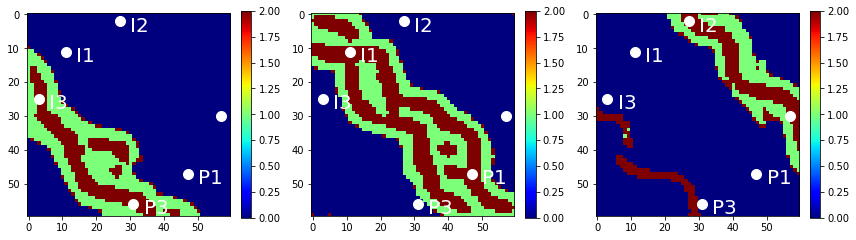

Model 2


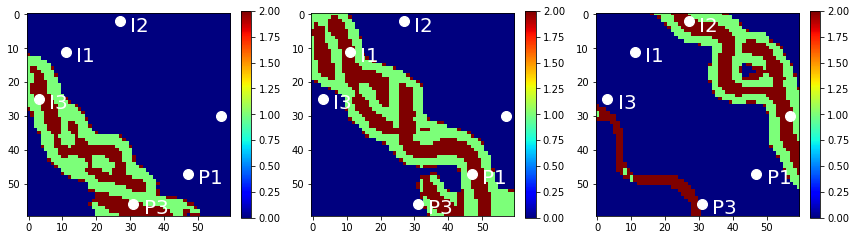

Model 3


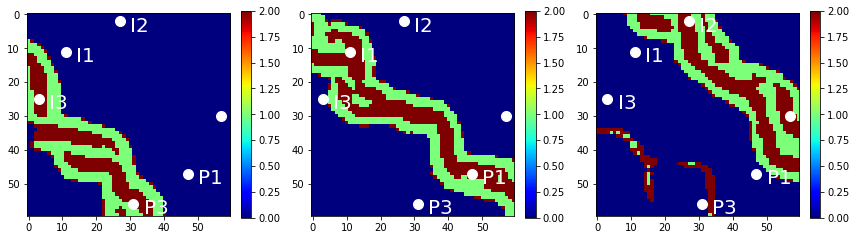

In [40]:
layers = [0, 15, 25]
nz = len(layers)
for k in range(3):
    print('Model %d' % (k+1))
    plt.figure(figsize=(12,8))
    for ind, z in enumerate(layers):
        plt.subplot(1,nz,ind+1)
        plt.imshow(m_pca_pred_ht[k, z, :, :, 0].astype('double'))
        plot_wells('w')
        plt.colorbar(fraction=0.046)
#         plt.clim([2, 8])
    plt.tight_layout()
    plt.show()

Model 1


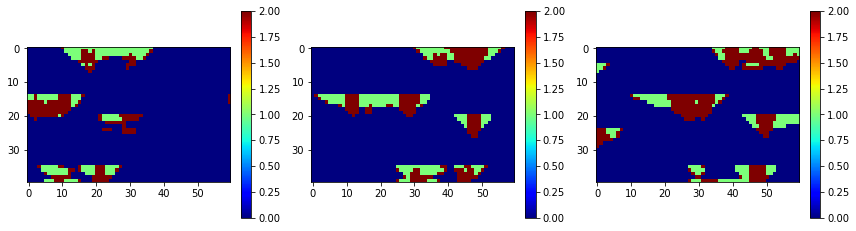

Model 2


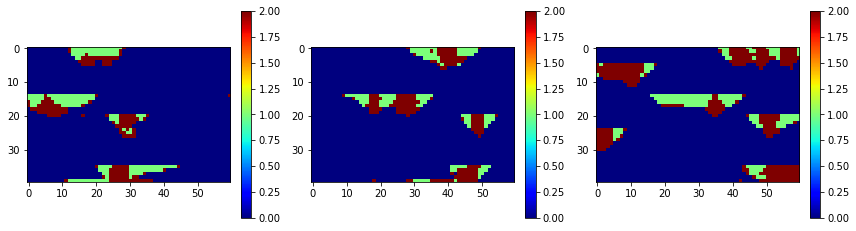

Model 3


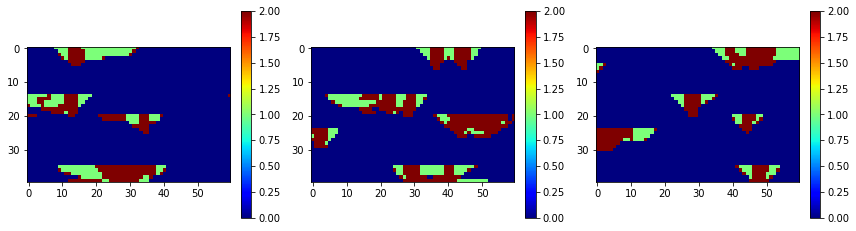

Model 4


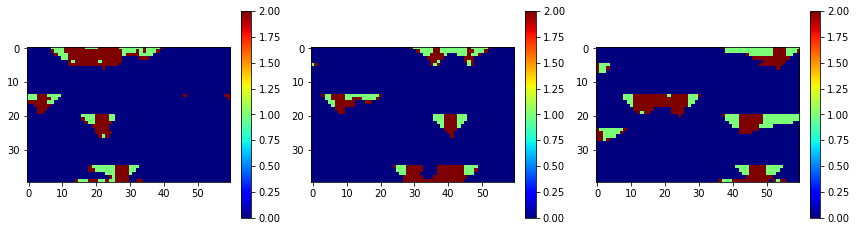

Model 5


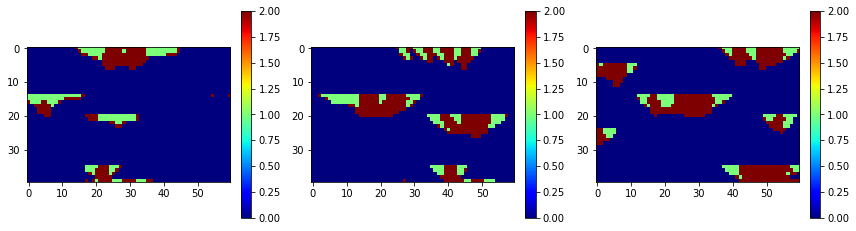

In [41]:
layers = [0, 15, 25]
nz = len(layers)
for k in range(5):
    print('Model %d' % (k+1))
    plt.figure(figsize=(12,8))
    for ind, z in enumerate(layers):
        plt.subplot(1,nz,ind+1)
        plt.imshow(m_pca_pred_ht[k, :, :, z, 0].astype('double'))
#         plot_wells('w')
        plt.colorbar(fraction=0.046)
#         plt.clim([2, 8])
    plt.tight_layout()
    plt.show()

##### Check Hard Data Match

In [42]:
# Load hard data
with open(args.hd_file, 'rb') as fid:
    well_hd = pickle.load(fid)
# Assemble hard data into one single np.array
well_hd_all = np.concatenate(list(well_hd.values()), axis=0)
print('Total number of hard data:', well_hd_all.shape[0])

Total number of hard data: 240


In [43]:
well_hd['I1'].shape

(40, 4)

In [44]:
hd_cnnpca = {}
for wn, hd in well_hd.items():
    ix = hd[:, 0].astype('int')
    iy = hd[:, 1].astype('int')
    iz = hd[:, 2].astype('int')
    hd_cnnpca[wn] = m_pca_pred_ht[:, iz, iy, ix, 0]
    

In [45]:
hd_cnnpca['I1'].shape

(1000, 40)

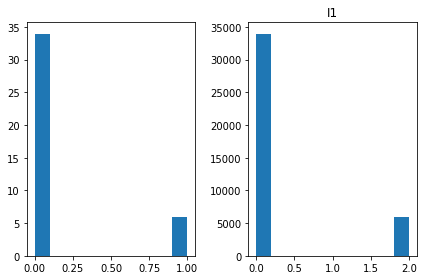

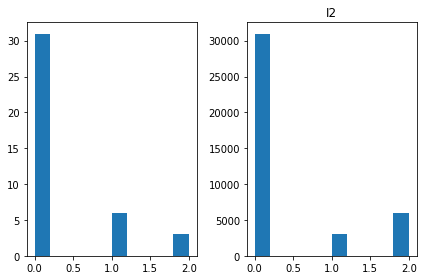

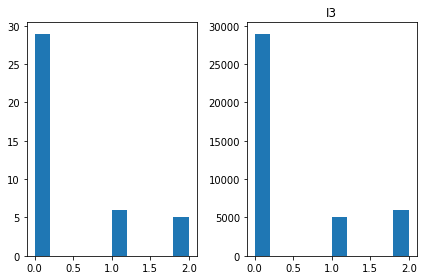

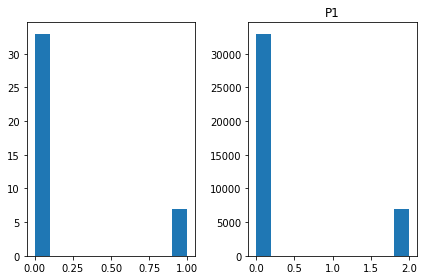

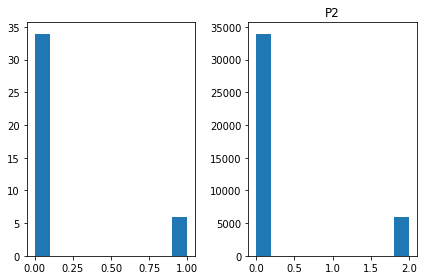

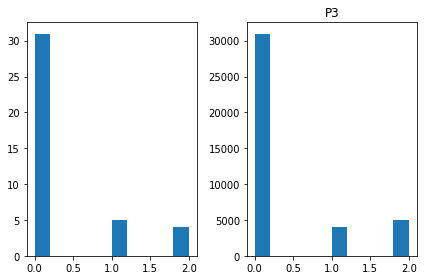

In [46]:
for wn, hd in well_hd.items():
    v = hd[:, 3]
    plt.subplot(1,2,1)
    plt.hist(v[np.where(v > -0.1)])
#     plt.xlim([5,9])
    plt.subplot(1,2,2)
    plt.hist(hd_cnnpca[wn][:, np.where(v > -0.1)].flatten())
    plt.title(wn)
    plt.tight_layout()
#     plt.xlim([5,9])
    plt.show()

In [47]:
m_pca_pred_ht.shape

(1000, 40, 60, 60, 1)

In [48]:
m_pca_pred_ht = m_pca_pred_ht.astype('int8')

In [49]:
# Save CNN-PCA Models
fid = h5py.File(os.path.join(data_dir,'mcnnpca_eval1000_levee_wider_wellsonly_60x60x40_cond6w_l800_ptb70_sw50.h5'), 'w')
fid.create_dataset('data', data=m_pca_pred_ht)
fid.close()

In [50]:
exit()